# Error measures comparing a network with a modified network

This notebook presents the sorcecode to compute error measures $\epsilon$ and $\epsilon_N$ for random graphs using ``networkx``.

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
centrali = "clos"
quota = 0.5
from networkx.algorithms import approximation as approx
from matplotlib.pyplot import figure
import math

The function ``cgraph`` returns a random graph with a given node size. Modify this function, e.g. by uncommenting lines.

In [21]:
def cgraph(nodesize):
    #G = nx.scale_free_graph(nodesize)
    #G = nx.Graph(G.to_undirected())
    G = nx.newman_watts_strogatz_graph(nodesize,50,0.5)
    return G

Set the value for ``centrali`` to a particular centrality measure, e.g. ```centrali = "deg"
centrali = "bet"
centrali = "eigen"
centrali = "clos"```

In [27]:
centrali = "clos"

Set ``maxi`` to the maximum number of iterations for $p_B$, ``iterations`` to the number of experiments to carry out. ``nodesize`` refers to the size of the random graph.

In [28]:
maxi = 60 
nodesize = 500
iterations = 60

The following lines will save the values for $\epsilon$ in the dataframe ``df``, and for $\epsilon_N$ in ``df2``.  Boxplots (as pdf) and tables (as csv) are exported afterwards.

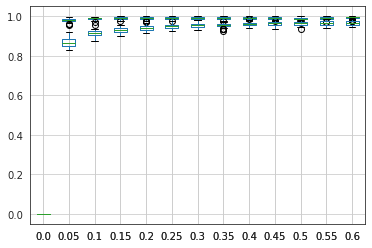

In [29]:
df = pd.DataFrame()
df2 = pd.DataFrame()
for j in range(0,iterations):
    q1 = []
    c1 = []
    c2 = []
    c3 = []
    c4 = []
    c5 = []
    c6 = []
    for l in range (0, maxi+1, 5):
        quote = l/100
        G = cgraph(nodesize)
        for n in G.nodes():
            if random.random() < quote:
                G.nodes[n]['attribute'] = True
            else:
                G.nodes[n]['attribute'] = False
        H = G.copy()
        dellist = []
        for n in H.nodes():
            if H.nodes[n]['attribute'] == True:
                dellist.append (n)
        for n in dellist:
            H.remove_node(n)
        if True: 
            if centrali == "bet":
                bet_centrality = nx.betweenness_centrality(G)#, normalized = True, 
                                                        #      endpoints = False)
                bet_centralityH = nx.betweenness_centrality(H, normalized = True, 
                                                              endpoints = False)
            elif centrali == "deg":
                bet_centrality = nx.degree_centrality(G)#, normalized = True, 
                                                        #      endpoints = False)
                bet_centralityH = nx.degree_centrality(H)
            elif centrali == "eigen":
                bet_centrality = nx.eigenvector_centrality(G)#, normalized = True, 
                                                        #      endpoints = False)
                bet_centralityH = nx.eigenvector_centrality(H)
            elif centrali == "clos":
                bet_centrality = nx.closeness_centrality(G)#, normalized = True, 
                                                        #      endpoints = False)
                bet_centralityH = nx.closeness_centrality(H)
            else: #  
                print ("No valid cm defined.")
            bet_centrality2 = {k: v for k, v in sorted(bet_centrality.items(), key=lambda item: item[1])}
            bet_centralityH2 = {k: v for k, v in sorted(bet_centralityH.items(), key=lambda item: item[1])}
            for n in dellist:
                del (bet_centrality2[n])
            # count errors
            error = 0
            for i in range(0,len(bet_centrality2.keys())):
                if list(bet_centrality2.keys())[i] != list(bet_centralityH2.keys())[i]:
                    error = error + 1
            # count neighbour errors
            nerror = 0
            for i in range(0,len(bet_centrality2.keys())):
                keyhere = list(bet_centrality2.keys())[i]
                keythere = list(bet_centralityH2.keys()).index(keyhere)
                if i>0 and keythere > 0 and list(bet_centrality2.keys())[i-1] != list(bet_centralityH2.keys())[keythere-1]:
                    nerror = nerror + 1
                if i<len(bet_centrality2.keys())-1 and keythere<len(bet_centrality2.keys())-1 and list(bet_centrality2.keys())[i+1] != list(bet_centralityH2.keys())[keythere+1]:
                    nerror = nerror + 1
            q1.append (quote)
            c1.append (error/len(bet_centrality2.keys()))
            c2.append (nerror/(len(bet_centrality2.keys())*2))
        else:
            print (str(quote)+";"+str(error/len(bet_centrality2.keys()))+";"+str(nerror/(len(bet_centrality2.keys())*2))+";n")
    df = pd.concat (  [df, pd.DataFrame([c1], columns=[q1])])
    df2 = pd.concat (  [df2, pd.DataFrame([c2], columns=[q1])])
# Save data and boxplots
boxplot = df.boxplot(column=q1)#,figsize=(16,8))  
boxplot.figure.savefig(centrali+"-"+str(nodesize)+'epsilon.pdf')
boxplot = df2.boxplot(column=q1)#,figsize=(16,8))  
boxplot.figure.savefig(centrali+"-"+str(nodesize)+'epsilonN.pdf')
df.to_csv(centrali+"-"+str(nodesize)+'epsilon.csv')
df2.to_csv(centrali+"-"+str(nodesize)+'epsilonN.csv')